### Week 2 Individual Assignment: Data Exploration

I am exploring data from the Opportunity Atlas--a dataset that examines social mobility and childhood outcomes using Moving to Opportunity program data--in this notebook. More specifically, I am working with the "Household Income and Incarceration for Children from Low-Income Households by Census Tract, Race, and Gender." 

I start by importing the data and gathering basic information about the dataset (i.e. number of observations, data types, and variable names). I look at the first 5 observations as well as a random sample. Next, I hone in on the mean household income rank variable and eliminate other variables from the dataset. The mean household income rank variable tells us the average income of adults whose parents were in the 25th percentile of household income. Household income ranks reflect income brackets. For example, households ranked as .2 have an annual income of 22K, households ranked .4 have an annual income of 43K, and households ranked .6 have an annual income of 69K. It appears that for this sample (individuals whose parents were in the lowest 25th percentile of income), income rankings fall between 0 and .4 (so 43K/year).

I rename the remaining variables and pull all of the Los Angeles observations. I then create categories for the mean household income rank variable, grouping the observations into 5 discrete buckets (ranking of .1 and lower, .1-.2, .2-.3, .3-.4, and .4 and above). I create a bar graph of the distribution of household income rankings across Los Angeles and find that the vast majority of households whose parents were in the 25th percentile for income have incomes between 30K and 40K. As a next step, it would be interesting to look more closely at the census tracts with household income rankings that fall below .3. 

In [1]:
#Import pandas library. Since I'll be working with a CSV file, I don't need geopandas.

import pandas as pd

In [2]:
#Read in my CSV file on household income and incarceration for children from low-income households by census tract, race, and gender.

opp_atlas = pd.read_csv('tract_outcomes_simple_final.csv')

In [3]:
#Taking a look at the number of variables/columns and observations/rows in my dataset. This one is large!

opp_atlas.shape

(73278, 65)

In [4]:
#Using .info to look at the first and last 5 observations of the dataset. It appears that this command works a little differently than it does in geopandas, which provides information on the data type and counts.

opp_atlas.info

<bound method DataFrame.info of        state  county   tract       cz      czname  kfr_pooled_pooled_p25  \
0          1       1   20100  11101.0  Montgomery               0.367813   
1          1       1   20200  11101.0  Montgomery               0.316781   
2          1       1   20300  11101.0  Montgomery               0.373485   
3          1       1   20400  11101.0  Montgomery               0.421511   
4          1       1   20500  11101.0  Montgomery               0.433415   
...      ...     ...     ...      ...         ...                    ...   
73273     72     153  750400      NaN         NaN                    NaN   
73274     72     153  750501      NaN         NaN                    NaN   
73275     72     153  750503      NaN         NaN                    NaN   
73276     72     153  750601      NaN         NaN                    NaN   
73277     72     153  750602      NaN         NaN                    NaN   

       kfr_pooled_pooled_p25_se  jail_pooled_pooled_p25

In [5]:
#Taking a look at the data types in this dataset. It appears that the majority of variables are floats.

opp_atlas.dtypes

state                   int64
county                  int64
tract                   int64
cz                    float64
czname                 object
                       ...   
black_male_count      float64
hisp_male_count       float64
white_female_count    float64
black_female_count    float64
hisp_female_count     float64
Length: 65, dtype: object

In [6]:
#Looking at all variable names. I will end up dropping a lot of these later to make my queries more manageable.

opp_atlas.columns.to_list()

['state',
 'county',
 'tract',
 'cz',
 'czname',
 'kfr_pooled_pooled_p25',
 'kfr_pooled_pooled_p25_se',
 'jail_pooled_pooled_p25',
 'jail_pooled_pooled_p25_se',
 'pooled_pooled_count',
 'kfr_black_pooled_p25',
 'kfr_black_pooled_p25_se',
 'kfr_hisp_pooled_p25',
 'kfr_hisp_pooled_p25_se',
 'kfr_white_pooled_p25',
 'kfr_white_pooled_p25_se',
 'jail_black_pooled_p25',
 'jail_black_pooled_p25_se',
 'jail_hisp_pooled_p25',
 'jail_hisp_pooled_p25_se',
 'jail_white_pooled_p25',
 'jail_white_pooled_p25_se',
 'white_pooled_count',
 'black_pooled_count',
 'hisp_pooled_count',
 'kfr_pooled_female_p25',
 'kfr_pooled_female_p25_se',
 'kfr_pooled_male_p25',
 'kfr_pooled_male_p25_se',
 'jail_pooled_female_p25',
 'jail_pooled_female_p25_se',
 'jail_pooled_male_p25',
 'jail_pooled_male_p25_se',
 'pooled_male_count',
 'pooled_female_count',
 'kfr_black_female_p25',
 'kfr_black_female_p25_se',
 'kfr_hisp_female_p25',
 'kfr_hisp_female_p25_se',
 'kfr_white_female_p25',
 'kfr_white_female_p25_se',
 'kfr_bl

In [7]:
#This command pulls the first 5 observations from the dataset.

opp_atlas.head(5)

,state,county,tract,cz,czname,kfr_pooled_pooled_p25,kfr_pooled_pooled_p25_se,jail_pooled_pooled_p25,jail_pooled_pooled_p25_se,pooled_pooled_count,...,jail_hisp_male_p25,jail_hisp_male_p25_se,jail_white_male_p25,jail_white_male_p25_se,white_male_count,black_male_count,hisp_male_count,white_female_count,black_female_count,hisp_female_count
0,1,1,20100,11101.0,Montgomery,0.367813,0.021693,0.031844,0.020345,228.14854,...,NaN,NaN,0.069903,0.035733,101.021520,NaN,NaN,89.647583,NaN,NaN
1,1,1,20200,11101.0,Montgomery,0.316781,0.014647,0.049013,0.019211,391.91345,...,NaN,NaN,0.002691,0.029357,32.695038,150.244080,NaN,46.506416,139.571000,NaN
2,1,1,20300,11101.0,Montgomery,0.373485,0.018376,0.030266,0.015061,394.79211,...,NaN,NaN,0.019237,0.013509,156.940720,50.579407,NaN,108.949490,49.571842,NaN
3,1,1,20400,11101.0,Montgomery,0.421511,0.019321,0.033916,0.014419,388.38309,...,NaN,NaN,0.018265,0.011083,181.365370,NaN,NaN,169.048230,NaN,NaN
4,1,1,20500,11101.0,Montgomery,0.433415,0.020093,0.013398,0.007040,419.08334,...,NaN,NaN,0.026169,0.014869,193.299360,28.388056,NaN,140.759220,21.622227,NaN


In [8]:
#And this command pulls 5 random observations from the dataset. 

opp_atlas.sample(5)

,state,county,tract,cz,czname,kfr_pooled_pooled_p25,kfr_pooled_pooled_p25_se,jail_pooled_pooled_p25,jail_pooled_pooled_p25_se,pooled_pooled_count,...,jail_hisp_male_p25,jail_hisp_male_p25_se,jail_white_male_p25,jail_white_male_p25_se,white_male_count,black_male_count,hisp_male_count,white_female_count,black_female_count,hisp_female_count
37134,28,141,950300,5100.0,Corinth,0.392951,0.016153,0.020170,0.008811,845.14124,...,NaN,NaN,0.047281,0.019627,400.88812,NaN,NaN,372.647090,NaN,NaN
12318,8,59,9824,28900.0,Denver,0.504895,0.021871,0.003089,0.003261,344.60095,...,-0.029141,0.028228,0.008020,0.009713,149.71982,NaN,9.827519,126.035740,NaN,16.816294
34766,26,163,532300,11600.0,Detroit,0.329606,0.026346,0.037918,0.030502,167.02419,...,NaN,NaN,NaN,NaN,NaN,79.516487,NaN,NaN,81.382614,NaN
19522,13,139,1605,9400.0,Gainesville,0.400387,0.028310,0.036776,0.021277,286.89767,...,NaN,NaN,0.029695,0.024919,130.96007,NaN,NaN,90.057503,NaN,NaN
4335,6,19,4701,37200.0,Fresno,0.385873,0.009800,0.017359,0.005037,1323.67190,...,0.014295,0.009213,0.034284,0.018768,141.45303,132.489300,308.722110,112.469350,130.182460,346.826780


In [9]:
#I am interested in looking more closely at the kfr_pooled_pooled_p25 variable, which is the median household income rank for households whose parents were in the bottom 25th percent of income distribution (I rename this variable later on). I use the .sample command to look at a random selection of this variable. According to the data dictionary, households are ranked according to income bracket (households ranked as .2 have an annual income of $22K, households ranked .4 have an annual income of $43K, households ranked .6 have an annual income of $69K, and so on). It appears that for this sample (households whose parents were in the lowest 25th percentile of income), households are ranking between 0 and .4 (so $43K/year). 

opp_atlas['kfr_pooled_pooled_p25'].sample(5)

3292     0.409224
53978    0.477829
52155    0.469996
8656     0.440171
67499    0.495475
Name: kfr_pooled_pooled_p25, dtype: float64

In [10]:
#Next, I look at the frequency distribution of each household income rank using the .value_counts command. This doesn't tell me much - this command just quantifies census tracts by income ranking. I will create categories of income rankings later on in this notebook. 

opp_atlas['kfr_pooled_pooled_p25'].value_counts()

0.407944    3
0.400625    3
0.304497    2
0.403644    2
0.437331    2
           ..
0.357479    1
0.474037    1
0.410215    1
0.436266    1
0.462032    1
Name: kfr_pooled_pooled_p25, Length: 71707, dtype: int64

In [11]:
#I pull key variables to hone in on - state, county, tract #, commuting zone name, mean household rank for children whose parents were at the 25th percentile of the national income distribution, fraction of children with parents at the 25th percentile of the national income distribution who were incarcerated as of 2010, and # of children under 18 living in the given tract with parents whose income was below the national median.

opp_atlas[['state','county', 'tract', 'czname','kfr_pooled_pooled_p25','jail_pooled_pooled_p25','pooled_pooled_count']]

,state,county,tract,czname,kfr_pooled_pooled_p25,jail_pooled_pooled_p25,pooled_pooled_count
0,1,1,20100,Montgomery,0.367813,0.031844,228.14854
1,1,1,20200,Montgomery,0.316781,0.049013,391.91345
2,1,1,20300,Montgomery,0.373485,0.030266,394.79211
3,1,1,20400,Montgomery,0.421511,0.033916,388.38309
4,1,1,20500,Montgomery,0.433415,0.013398,419.08334
...,...,...,...,...,...,...,...
73273,72,153,750400,NaN,NaN,NaN,NaN
73274,72,153,750501,NaN,NaN,NaN,NaN
73275,72,153,750503,NaN,NaN,NaN,NaN
73276,72,153,750601,NaN,NaN,NaN,NaN


In [12]:
#I save the new subsection of the data (which includes the variables listed above) as selected_columns. I will use selected_columns moving forward.

selected_columns = opp_atlas[['state','county', 'tract', 'czname','kfr_pooled_pooled_p25','jail_pooled_pooled_p25','pooled_pooled_count']]

In [13]:
#I want to take a look at the first 5 observations to make sure selected_columns saved correctly above. Looks like it did!

selected_columns.head()

,state,county,tract,czname,kfr_pooled_pooled_p25,jail_pooled_pooled_p25,pooled_pooled_count
0,1,1,20100,Montgomery,0.367813,0.031844,228.14854
1,1,1,20200,Montgomery,0.316781,0.049013,391.91345
2,1,1,20300,Montgomery,0.373485,0.030266,394.79211
3,1,1,20400,Montgomery,0.421511,0.033916,388.38309
4,1,1,20500,Montgomery,0.433415,0.013398,419.08334


In [14]:
#I rename the variables in selected_columns and print them out. 

selected_columns.columns = ['state', 'county', 'tract', 'commuting_zone_name', 'household_income_rank', 'with_incarcerated_parents', 'count_below_median_income']

In [15]:
selected_columns.columns.to_list()

['state',
 'county',
 'tract',
 'commuting_zone_name',
 'household_income_rank',
 'with_incarcerated_parents',
 'count_below_median_income']

In [16]:
#Next, I want to hone in on the observations for all households in Los Angeles. I pull all observations with commuting_zone_name = Los Angeles. There are almost 4,000 observations for Los Angeles.

selected_columns[selected_columns.commuting_zone_name == 'Los Angeles']

,state,county,tract,commuting_zone_name,household_income_rank,with_incarcerated_parents,count_below_median_income
1449,4,12,20100,Los Angeles,0.319642,NaN,363.09528
1450,4,12,20201,Los Angeles,0.366709,0.036475,263.88028
1451,4,12,20202,Los Angeles,0.452342,0.002217,88.33606
1452,4,12,20501,Los Angeles,NaN,NaN,NaN
1453,4,12,20502,Los Angeles,0.413288,-0.187132,174.38457
...,...,...,...,...,...,...,...
11498,6,111,8600,Los Angeles,0.401595,0.026163,1892.53660
11499,6,111,8700,Los Angeles,0.388960,0.014026,1293.03520
11500,6,111,8800,Los Angeles,0.404445,0.003580,879.19543
11501,6,111,8900,Los Angeles,0.421389,-0.000244,635.56891


In [23]:
#Continuing to work with the Los Angeles observations. I want to know how many census tracts in Los Angeles with children whose parents were in the 25th income percentile have an average income of less than $11K (or .1 income ranking and below). It appears that this is the case for only 1 census tract in LA.

less_than_one = selected_columns[(selected_columns.commuting_zone_name == 'Los Angeles') & (selected_columns.household_income_rank <0.1)]
less_than_one

,state,county,tract,commuting_zone_name,household_income_rank,with_incarcerated_parents,count_below_median_income
7023,6,37,980005,Los Angeles,-0.032857,NaN,0.0


In [24]:
#Interesting - it appears that there are no census tracts within LA that fall within the .1 and .2 income ranking ($11K and $22K). I find this hard to believe.

pointone_pointtwo = selected_columns[(selected_columns.commuting_zone_name == 'Los Angeles') & (selected_columns.household_income_rank >=0.1) & (selected_columns.household_income_rank <=0.2)]
pointone_pointtwo

,state,county,tract,commuting_zone_name,household_income_rank,with_incarcerated_parents,count_below_median_income


In [25]:
#Next I pull Los Angeles census tracks with household income rankings between .2 and .3. There are 7 observations that meet this criteria.

pointtwo_pointthree = selected_columns[(selected_columns.commuting_zone_name == 'Los Angeles') & (selected_columns.household_income_rank >=0.2) & (selected_columns.household_income_rank <=0.3)]
pointtwo_pointthree

,state,county,tract,commuting_zone_name,household_income_rank,with_incarcerated_parents,count_below_median_income
5239,6,37,206300,Los Angeles,0.275842,0.022543,599.564210
5466,6,37,236204,Los Angeles,0.288402,0.029140,913.204220
5520,6,37,242100,Los Angeles,0.294042,0.075526,1363.499600
6653,6,37,600601,Los Angeles,0.287806,0.040217,464.279300
6865,6,37,800330,Los Angeles,0.295595,0.001238,56.674393
7029,6,37,980013,Los Angeles,0.238851,-0.012002,0.000000
7040,6,37,980028,Los Angeles,0.279172,0.057233,0.606052


In [26]:
#I pull Los Angeles census tracks with household income rankings between .3 and .4. There are 819 observations that meet this criteria.

pointthree_pointfour = selected_columns[(selected_columns.commuting_zone_name == 'Los Angeles') & (selected_columns.household_income_rank >=0.3) & (selected_columns.household_income_rank <=0.4)]
pointthree_pointfour

,state,county,tract,commuting_zone_name,household_income_rank,with_incarcerated_parents,count_below_median_income
1449,4,12,20100,Los Angeles,0.319642,NaN,363.095280
1450,4,12,20201,Los Angeles,0.366709,0.036475,263.880280
1455,4,12,940200,Los Angeles,0.393324,0.017646,636.157530
1456,4,12,940300,Los Angeles,0.344846,0.023330,1037.684800
4721,6,37,104108,Los Angeles,0.389443,0.007063,1461.611500
...,...,...,...,...,...,...,...
11455,6,111,7300,Los Angeles,0.340492,0.009581,83.794395
11470,6,111,7606,Los Angeles,0.379681,0.045863,93.267715
11486,6,111,8005,Los Angeles,0.383920,-0.002150,358.222810
11499,6,111,8700,Los Angeles,0.388960,0.014026,1293.035200


In [55]:
#Lastly, I pull Los Angeles census tracks with household income rankings at .4 and above. There are 3,059 observations that meet this criteria.

pointfour_above = selected_columns[(selected_columns.commuting_zone_name == 'Los Angeles') & (selected_columns.household_income_rank >=0.4)]
pointfour_above

,state,county,tract,commuting_zone_name,household_income_rank,with_incarcerated_parents,count_below_median_income
1451,4,12,20202,Los Angeles,0.452342,0.002217,88.33606
1453,4,12,20502,Los Angeles,0.413288,-0.187132,174.38457
1454,4,12,20602,Los Angeles,0.400349,0.023101,388.35815
4704,6,37,101110,Los Angeles,0.460825,0.001031,659.77216
4705,6,37,101122,Los Angeles,0.473376,0.013287,250.51698
...,...,...,...,...,...,...,...
11496,6,111,8402,Los Angeles,0.457195,0.020466,231.86116
11497,6,111,8500,Los Angeles,0.532037,0.014350,319.57721
11498,6,111,8600,Los Angeles,0.401595,0.026163,1892.53660
11500,6,111,8800,Los Angeles,0.404445,0.003580,879.19543


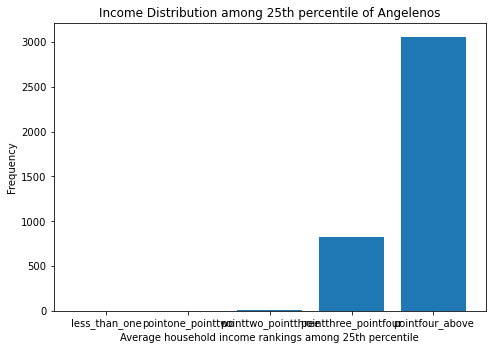

In [59]:
#I want to create a bar chart using the income categories I created above. I found this code for bar charts online.

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Frequency')
ax.set_xlabel('Average household income rankings among 25th percentile')
ax.set_title('Income Distribution among 25th percentile of Angelenos')
ranking_categories = ['less_than_one', 'pointone_pointtwo', 'pointtwo_pointthree', 'pointthree_pointfour', 'pointfour_above']
frequency = [1,0,7,819,3059]
ax.bar(ranking_categories,frequency)
plt.show()

In [60]:
#As seen by the bar chart, the vast majority of households living in Los Angeles whose parents were in the 25th income percentile have incomes between .3 and .4, or $30K and $40K.
